# Imports:

In [213]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence

# Classes:

In [186]:
class BallisticDeposition:
    """
    class fields :
    colors:the list of colors used in visualization

    the class to model Ballistic Deposition
    methods:
    step:
        the function to add an amount of objects

    miniStep:
        the function to add one object

    run:
        the function to do the process of Ballistic Deposition

    visualize:
        the function to show the states of the process

    result:
        the function to show the result of the process

    checkIndex:
        the function to process the limitations of the area

    getIndexOfMin:
        the function to compare the heights of the three indexes and return the index with min hieght
    """
    colors = ["blue","red"]
    def __init__(self, miniSteps: int, steps: int, length: int) -> None:
        """
        the function to create the Ballistic Deposition model object

        :param miniSteps: the amount of objects added after a step
        :type miniSteps: int
        :param steps: the amount of steps in the process
        :type steps: int
        :param length: the size of the platform in Ballistic Deposition
        :type length: int
        """
        self.miniSteps = miniSteps
        self.steps = steps
        self.length = length
        self.averages = []
        self.w = []
        self.x = np.zeros(length)
        self.t =range(1,steps+1)
        self.yTicks = range(0,int(3*miniSteps*steps/length),steps)
        self.data = []


    def step(self) -> None:
        """
        the function to add an amount of objects
        """
        for i in range(self.miniSteps):
            self.miniStep()


    def miniStep(self) -> None:
        """
        the function to add one object
        """
        index = np.random.uniform(0,self.length-1)
        finalIndex = self.checkIndex(int(index))
        self.x[finalIndex] += 1

    def run(self) -> None:
        """
        the function to do the process of Ballistic Deposition
        """
        for i in range(self.steps):
            self.step()

            x_bar = sum(self.x)
            sigma = np.sqrt(np.var(self.x))
            self.averages.append(x_bar)
            self.w.append(sigma)
            self.data.append(self.x.copy())

    def visualize(self) -> None:
        """
        the function to show the states of the process
        """
        plt.clf()
        for i in range(1,self.steps+1):
            c = BallisticDeposition.colors[i%2]
            plt.bar(range(self.length),self.data[-i],color = c)
            plt.yticks(self.yTicks)

    def result(self) -> None:
        """
        the function to show the result of the process
        """
        plt.plot(self.t,self.w)
        plt.title("w(t): ")
        plt.show()
        tArray = np.array(self.t)
        sigmasArray = np.array(self.w)
        logSigmas = np.log10(sigmasArray)
        logT = np.log10(tArray)
        plt.plot(logT,logSigmas)
        plt.title("logW(logT): ")
        plt.show()

        print("r2 for log(w) and log(t): ",np.corrcoef(logT, logSigmas)[0][1])
        print("beta: ",np.polyfit(logT,logSigmas,1)[0])

    def checkIndex(self, index: int) -> int:
        """
        the function to process the limitations of the area

        :param index: the random input index
        :type index: int
        :return: the final index after performing relaxation
        :rtype: int
        """
        return self.getIndexOfMin((index - 1) % self.length, index, (index + 1) % self.length)

    def getIndexOfMin(self, index1: int, index2: int, index3: int) -> int:
        """
        the function to compare the heights of the three indexes and return the index with min hieght

        :param index1: the index before random input index
        :type index1: int
        :param index2: the random input index
        :type index2: int
        :param index3: the index after random input index
        :type index3: int
        :return: the index with min hiegth
        :rtype: int
        """
        xs = [self.x[index1],self.x[index2],self.x[index3]]
        return [index1,index2,index3][xs.index(min(xs))]




# Main part:

### starting the process:

In [196]:
bd = BallisticDeposition(100,5,30)
bd.run()

### getting the result:

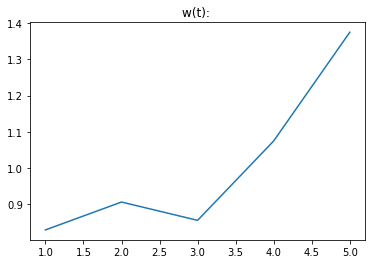

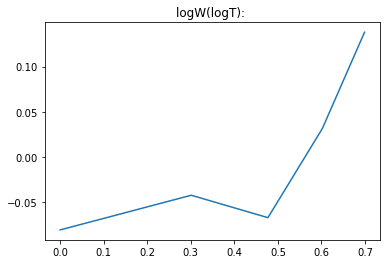

r2 for log(w) and log(t):  0.7930405146419955
beta:  0.26042770772066337


In [197]:
bd.result()

### visualizing:

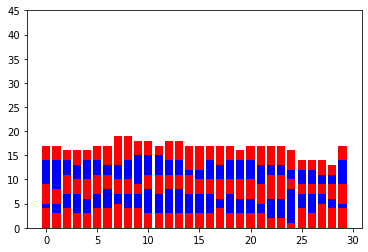

In [198]:
bd.visualize()

# Iterating

In [199]:
def getMean(miniSteps: int, steps: int, length: int, iterations: int) -> np.array:
    """
    the function to perform iterations on BallisticDeposition

    :param miniSteps: the amount of objects added after a step
    :type miniSteps: int
    :param steps: the amount of steps in the process
    :type steps: int
    :param length: the size of the platform in Ballistic Deposition
    :type length: int
    :param iterations:
    :type iterations:int
    :return:the mean w of the iterations
    :rtype:np.array
    """
    ws = []
    for _ in range(iterations):
        bd = BallisticDeposition(miniSteps,steps,length)
        bd.run()
        ws.append(bd.w)
        del bd

    wsArr = np.array(ws)
    meansW = wsArr.mean(axis=0)
    return meansW

### trying for different lengths:

In [200]:
meansW1 = getMean(3000,100,100,500)

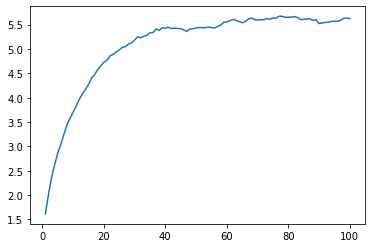

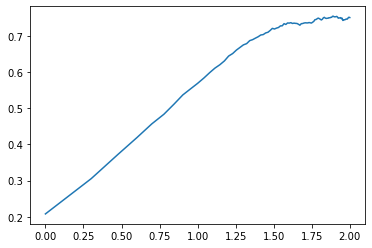

In [201]:
plt.plot(range(1,101),meansW1)
plt.show()
plt.plot(np.log10(range(1,101)),np.log10(meansW1))
plt.show()

In [202]:
meansW2 = getMean(3000,100,80,500)

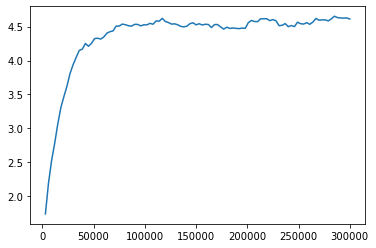

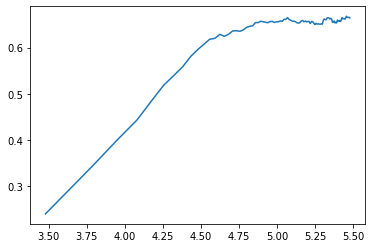

In [203]:
plt.plot(np.array(range(1,101))*3000,meansW2)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*3000),np.log10(meansW2))
plt.show()

In [204]:
meansW3 = getMean(3000,100,60,500)

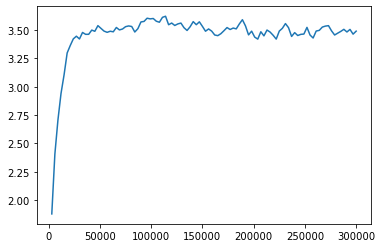

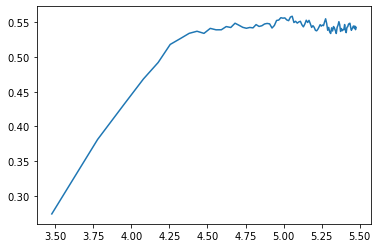

In [205]:
plt.plot(np.array(range(1,101))*3000,meansW3)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*3000),np.log10(meansW3))
plt.show()

In [209]:
meansW4 = getMean(3000,100,70,500)

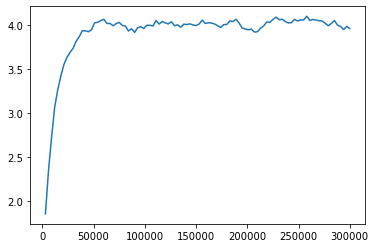

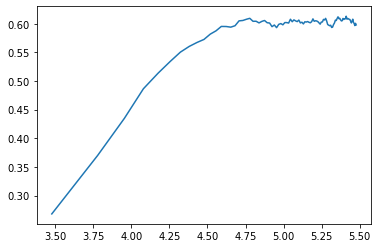

In [210]:
plt.plot(np.array(range(1,101))*3000,meansW4)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*3000),np.log10(meansW4))
plt.show()

In [211]:
meansW5 = getMean(3000,100,90,500)

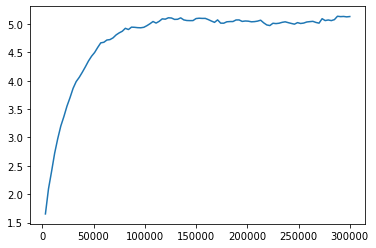

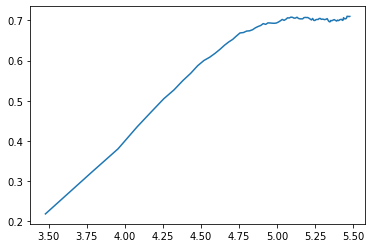

In [212]:
plt.plot(np.array(range(1,101))*3000,meansW5)
plt.show()
plt.plot(np.log10(np.array(range(1,101))*3000),np.log10(meansW5))
plt.show()

In [215]:
def getCrossingPoint(meanW: np.array, scale: int) -> Sequence:
    """
    the function to get the crossing point og=f each plot

    :param scale:the scaling param for time
    :type scale: int
    :rtype: object
    """
    lastPart = np.log10(meanW[:int(len(meanW)/2 -1):-1])
    firstPart = np.log10(meanW[:5])
    logWStar = np.mean(lastPart)
    m = (firstPart[1]-firstPart[0])/(np.log10(np.array(4*scale)))
    return logWStar,m


#### getting data for corossing points and calculating beta  , alpha and z

In [216]:
means = [meansW1,meansW2,meansW3,meansW4,meansW5]
scales = [3000,3000,3000,3000,3000]
logLs = np.log10(np.array([100,80,60,70,90]))
logWStars = []
ms = []
for i in range(5):
    x,y = getCrossingPoint(means[i],scales[i])
    logWStars.append(x)
    ms.append(y)

beta = np.mean(ms)
alpha = np.polyfit(logLs,logWStars,1)[0]
z = alpha/beta

#### plotting log(w*) and log(L) and printing the result

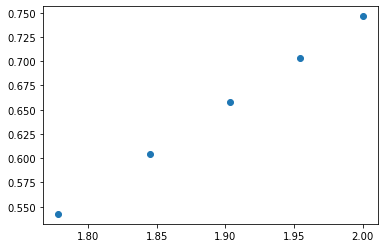


 alpha is : 0.9164138392110007

 beta is : 0.02503589110578861

 x is : 36.60400324233374


In [217]:
plt.scatter(logLs,logWStars)
plt.show()

print("\n alpha is :",alpha)
print("\n beta is :",beta)
print("\n z is :",z)